In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def sigmoid_activation(x):
    return 1.0/(1+np.exp(-x))

def predict(X,W):
    preds = sigmoid_activation(X.dot(W))
    preds[preds<=0.5] = 0
    preds[preds>0] = 1
    
    return preds


In [3]:
epochs = 100
alpha = 0.01

In [4]:
(X,y) =make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.5, random_state=1)

In [5]:
y = y.reshape((y.shape[0],1))

In [6]:
X.shape

(1000, 2)

In [7]:
X = np.c_[X, np.ones((X.shape[0]))]
X.shape

(1000, 3)

In [8]:
(trainX,testX,trainY,testY) = train_test_split(X,y,test_size=0.5,random_state=42)

In [9]:
W = np.random.randn(X.shape[1],1)
losses = []

In [10]:
for epoch in np.arange(0, epochs):
    preds = sigmoid_activation(trainX.dot(W))
    
    error = preds - trainY
    loss = np.sum(error**2)
    losses.append(loss)
    
    gradient = trainX.T.dot(error)
    
    W += -alpha * gradient
    
    if epoch == 0 or (epoch + 1) % 5 == 0:
        print(f"[INFO] epoch={epoch+1}, loss={loss}")


[INFO] epoch=1, loss=192.30736197138125
[INFO] epoch=5, loss=3.7597793921774914
[INFO] epoch=10, loss=1.6281199940252185
[INFO] epoch=15, loss=0.7211631119017179
[INFO] epoch=20, loss=0.31794383136015125
[INFO] epoch=25, loss=0.15392264952011966
[INFO] epoch=30, loss=0.09021103693348459
[INFO] epoch=35, loss=0.061568148099797715
[INFO] epoch=40, loss=0.04655683992288508
[INFO] epoch=45, loss=0.03766416980801348
[INFO] epoch=50, loss=0.03187913910234351
[INFO] epoch=55, loss=0.027836579733085464
[INFO] epoch=60, loss=0.024851114112841178
[INFO] epoch=65, loss=0.022548902679234286
[INFO] epoch=70, loss=0.020711715073287014
[INFO] epoch=75, loss=0.019204795498224677
[INFO] epoch=80, loss=0.01794092155774751
[INFO] epoch=85, loss=0.016861339352890695
[INFO] epoch=90, loss=0.01592509669935938
[INFO] epoch=95, loss=0.01510279513404056
[INFO] epoch=100, loss=0.01437278170910561


In [12]:
preds = predict(testX, W)
print(classification_report(testY, preds))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       250
           1       0.99      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



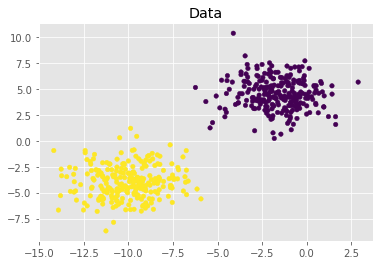

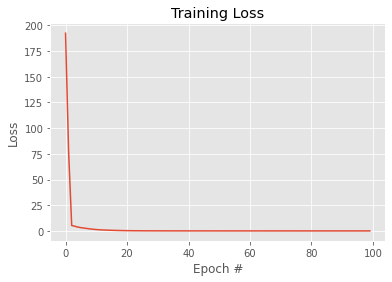

In [13]:
plt.style.use('ggplot')
plt.figure()
plt.title("Data")
plt.scatter(testX[:,0], testX[:,1],marker="o", c=testY, s=20)

plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, epochs),losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()